Populating the interactive namespace from numpy and matplotlib
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


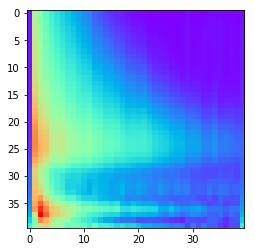

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import glob
import numpy as np
import os

%pylab inline

pwd = os.getcwd()
tfrecord_file_path = pwd + "/CAE_input.tfrecord"
filename_queue = tf.train.string_input_producer(
                              tf.train.match_filenames_once(tfrecord_file_path),
                              shuffle=True, num_epochs=None)

reader = tf.TFRecordReader()
_, serialized_example = reader.read(filename_queue)
features = tf.parse_single_example(serialized_example,
                                       features={'data': tf.FixedLenFeature([], tf.string)}) 
img = tf.decode_raw(features['data'], tf.uint8)
img = tf.reshape(img, [40, 40])
input_batch = tf.train.batch([img],batch_size=10,num_threads=1)

with tf.Session() as sess:   
    tf.local_variables_initializer().run()
    tf.global_variables_initializer().run()
    coord = tf.train.Coordinator()
    thread = tf.train.start_queue_runners(sess=sess,coord=coord)
    
    for i in range(1):
        _img = sess.run([img])
        
    plt.imshow(_img[0],cmap=plt.get_cmap('rainbow'))
    
    coord.request_stop()
    coord.join(thread)
    